In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

In [3]:
df = pd.read_csv('emails.csv')

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.shape

(5172, 3002)

In [6]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [20]:
#Checking for NULL values
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [21]:
# Removing unncessary Column
df = df.drop('Email No.', axis=1)

In [25]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

#### When you specify axis=1, you are telling pandas to drop the 'Prediction' column along the horizontal axis (i.e., the columns axis). As a result, the variable X will contain a new DataFrame that is a copy of the original DataFrame df, but with the 'Prediction' column removed

In [27]:
X = df.drop('Prediction', axis = 1)
y = df['Prediction']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
y_pred = neigh.predict(X_test)

In [35]:
neigh.score(X_train, y_train)
neigh.score(X_test, y_test)

0.9140096618357488

In [36]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[699,  35],
       [ 54, 247]], dtype=int64)

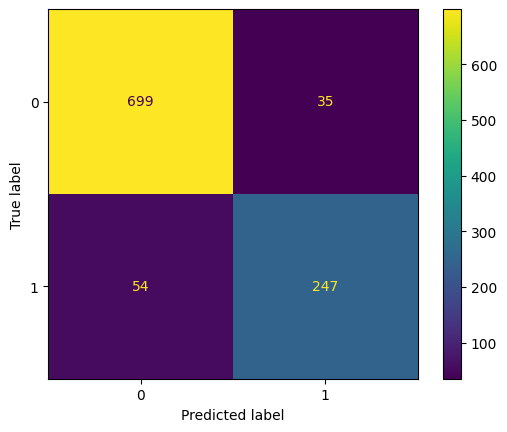

In [37]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [39]:
print("accuracy_score: ")
accuracy_score(y_test, y_pred)


accuracy_score: 


0.9140096618357488

In [40]:
print("precision_score: ")
precision_score(y_test, y_pred)


precision_score: 


0.875886524822695

In [41]:

print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.08599033816425117

In [42]:
print("recall_score: ")
recall_score(y_test, y_pred)

recall_score: 


0.8205980066445183

#### "SVC" stands for Support Vector Classification, which is used for classification tasks.
#### gamma='auto': This is an argument you are passing to the SVC constructor. In this case, you are setting the gamma parameter to 'auto'. The gamma parameter is a hyperparameter in SVM that controls the shape of the decision boundary. When you set it to 'auto', Scikit-Learn will automatically calculate an appropriate value for gamma based on the training data. This can be a convenient option when you're not sure what value of gamma to use.

In [45]:
# Using SVM
from sklearn.svm import SVC
SVM = SVC(gamma = 'auto')
SVM.fit(X_train, y_train)


SVC(gamma='auto')

In [50]:
y_pred = SVM.predict(X_test)

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
print("accuracy_score: ")
accuracy_score(y_test, y_pred)

accuracy_score: 


0.9371980676328503


In the confusion matrix `cm` you provided:

```
array([[692,  57],
       [ 51, 235]], dtype=int64)
```

- `692` is the True Positive (TP) count. These are cases where the model correctly predicted the positive class (e.g., correctly predicted that an event occurred).

- `235` is the True Negative (TN) count. These are cases where the model correctly predicted the negative class (e.g., correctly predicted that an event did not occur).

- `57` is the False Positive (FP) count. These are cases where the model incorrectly predicted the positive class when it was actually the negative class. In other words, the model made a false alarm or Type I error.

- `51` is the False Negative (FN) count. These are cases where the model incorrectly predicted the negative class when it was actually the positive class. In other words, the model missed detecting the event, leading to a Type II error.

So, in this confusion matrix, you have:

- 692 True Positives (correct positive predictions).
- 235 True Negatives (correct negative predictions).
- 57 False Positives (incorrect positive predictions).
- 51 False Negatives (incorrect negative predictions).